<a href="https://colab.research.google.com/github/argyaWicaksana/PCVK-College/blob/main/Gamma_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Argya Wicaksana
# TI3B / 06

In [18]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


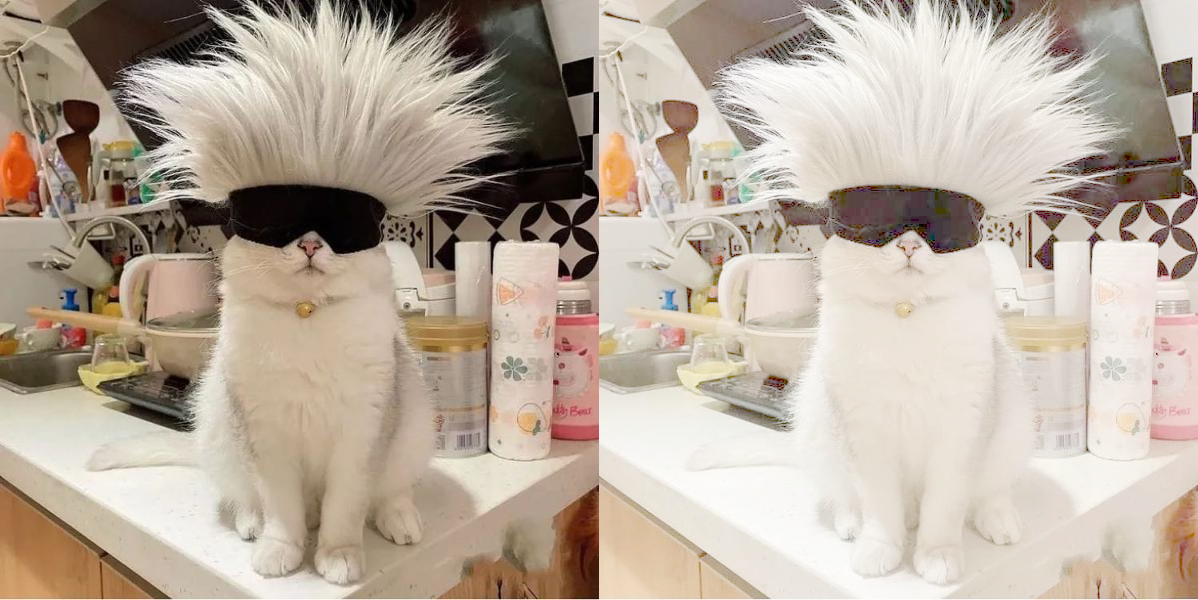

In [7]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/random/catSatoru.jpg')

gamma_corrected = np.power((original / 255), 1/gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

final_frame=cv2.hconcat ((original,gamma_corrected))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 2


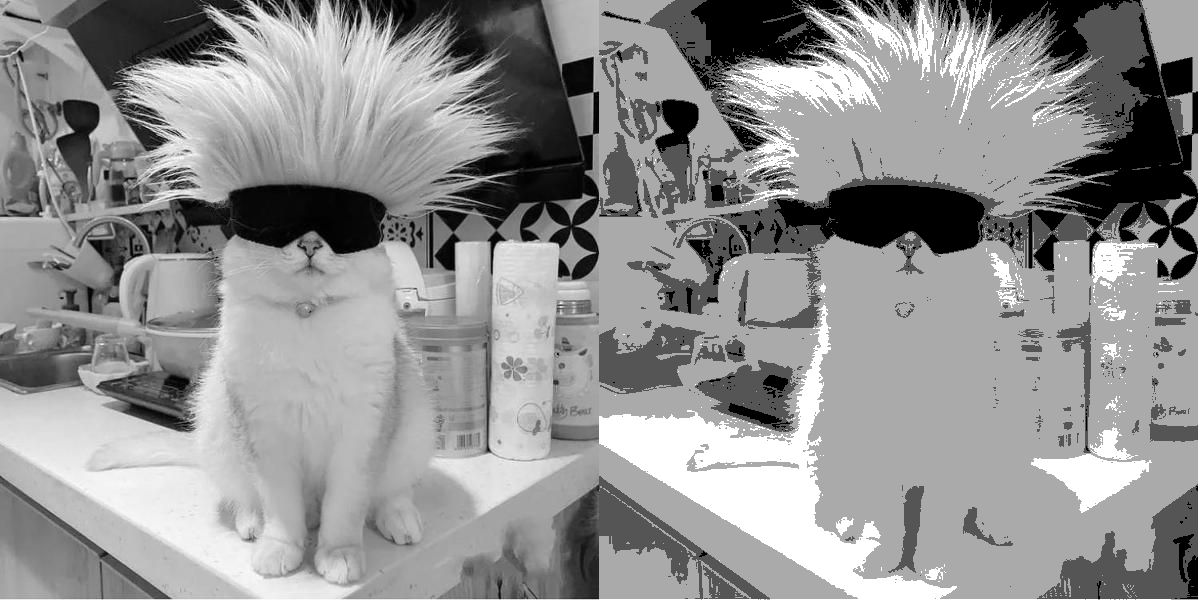

In [17]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1)
grayscale = cv2.imread('/content/drive/MyDrive/random/catSatoru.jpg', cv2.IMREAD_GRAYSCALE)
# depth_image = np.zeros(grayscale.shape, grayscale.dtype)

# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#             depth_image[y,x]=np.clip(round(grayscale[y,x] / level) * level,0,255)

depth_image = np.round(grayscale/level) * level
depth_image = depth_image.astype(np.uint8)

final_frame=cv2.hconcat ((grayscale,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 100
28.925048492852596


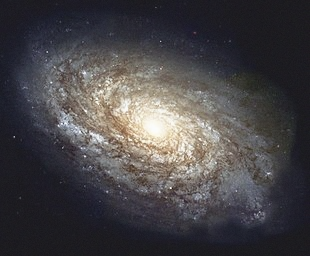

In [50]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Buat image masking


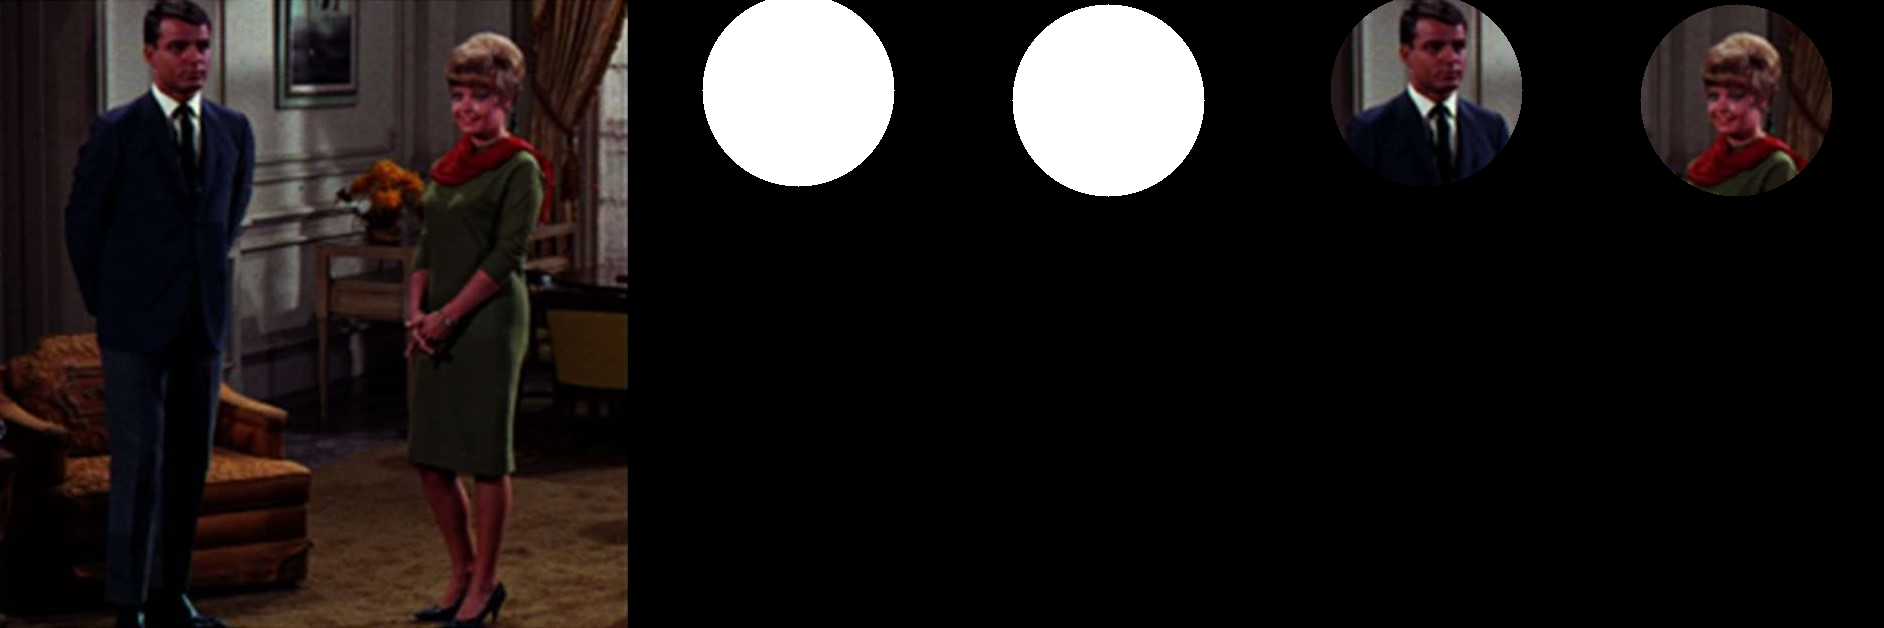

In [63]:
couple_img = cv2.imread('/content/drive/MyDrive/pcvk/Cpl.jpg')

center1 = (170, 90) # h,v
radius1 = 96
center2 = (480, 100)
radius2 = 96

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(couple_img, mask)

final_frame = cv2.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)